#Project Title: Laptop Price Prediction for SmartTech Co.

Project Overview:

SmartTech Co. has partnered with our data science team to develop a robust machine learning model that predicts laptop prices accurately. As the market for laptops continues to expand with a myriad of brands and specifications, having a precise pricing model becomes crucial for both consumers and manufacturers.

Client's Objectives:

Accurate Pricing: Develop a model that can accurately predict laptop prices based on various features, helping our clients stay competitive in the market.

Market Positioning: Understand how different features contribute to pricing, enabling SmartTech Co. to strategically position its laptops in the market.

Brand Influence: Assess the impact of brand reputation on pricing, providing insights into brand perception and market demand.

Key Challenges:

Diverse Specifications: The dataset encompasses laptops with diverse specifications. Our challenge is to build a model that generalizes well across a wide range of features.

Real-time Prediction: The model should have the capability to predict prices for newly released laptops, reflecting the fast-paced nature of the tech industry.

Interpretability: It is crucial to make the model interpretable, allowing SmartTech Co. to understand the rationale behind pricing predictions.

Project Phases:
1. Data Exploration and Understanding:

Dive into the dataset to understand the landscape of laptop specifications.

Visualize trends in laptop prices and identify potential influential features.

2. Data Preprocessing:

Handle missing values, outliers, and encode categorical variables.

Ensure the dataset is ready for model training.

3. Feature Engineering:

Extract meaningful features to enhance model performance.

Consider creating new features that capture the essence of laptop pricing.

4. Model Development:

Employ machine learning algorithms such as Linear Regression, Random Forest, and Gradient Boosting to predict laptop prices.

Evaluate and choose the model that aligns best with the project's objectives.

5. Real-time Predictions:

Implement a mechanism for the model to make predictions for new laptops entering the market.

6. Interpretability and Insights:

Uncover insights into which features play a pivotal role in pricing decisions.

Ensure that SmartTech Co. can interpret and trust the model's predictions.

7. Client Presentation:

Present findings, model performance, and insights to SmartTech Co. stakeholders.

Address any questions or concerns and gather feedback for potential model improvements.

Expected Outcomes:
1. A reliable machine learning model capable of predicting laptop prices with high accuracy.

2. Insights into the factors influencing laptop prices, empowering SmartTech Co. in market positioning and strategy.

Questions to Explore:
1. Which features have the most significant impact on laptop prices?

2. Can the model accurately predict the prices of laptops from lesser-known brands?

3. Does the brand of the laptop significantly influence its price?

4. How well does the model perform on laptops with high-end specifications compared to budget laptops?

5. What are the limitations and challenges in predicting laptop prices accurately?

6. How does the model perform when predicting the prices of newly released laptops not present in the training dataset?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [52]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv("/content/laptop.csv")

In [4]:
df.head(3)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [5]:
df.shape

(1303, 13)

Total Rows = 1303 and Column = 13

Removing the "Unnamed: 0.1","Unnamed: 0" column which is of no use.

In [6]:
df.drop(["Unnamed: 0.1","Unnamed: 0"], axis=1,inplace= True)

In [7]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [8]:
df.isnull().sum()

,0
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30
Weight,30


Droping the Null value

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 119.3+ KB


In [12]:
df.duplicated().sum()

np.int64(29)

Deleting the Duplicate values.

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(1244, 11)

After deleting duplicate and null value and unwanted column we have total of :
1. Rows = 1244
2. Column = 11

In [16]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


Removing the GB from Ram and kg from Weight

In [17]:
df["Ram"] =  df["Ram"].str.replace("GB","")

In [18]:
df["Weight"].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '2.5kg', '1.62kg', '1.91kg',
       '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg', '2.71kg', '1.2kg',
       '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg', '3.2kg', '1.49kg',
       '2.4kg', '2.13kg', '2.43kg', '1.7kg', '1.4kg', '1.8kg', '1.9kg',
       '3kg', '1.252kg', '2.7kg', '2.02kg', '1.63kg', '1.96kg', '1.21kg',
       '2.45kg', '1.25kg', '1.5kg', '2.62kg', '1.38kg', '1.58kg',
       '1.85kg', '1.23kg', '2.16kg', '2.36kg', '7.2kg', '2.05kg',
       '1.32kg', '1.75kg', '0.97kg', '2.56kg', '1.48kg', '1.74kg',
       '1.1kg', '1.56kg', '2.03kg', '1.05kg', '5.4kg', '4.4kg', '1.90kg',
       '1.29kg', '2.0kg', '1.95kg', '2.06kg', '1.12kg', '3.49kg',
       '3.35kg', '2.23kg', '?', '2.9kg', '4.42kg', '2.69kg', '2.37kg',
       '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg', '1.41kg', '4.14kg',
       '2.18kg', '2.24kg', '2.67kg', '4.1kg', '2.14kg', '1.36kg',
       '

In [19]:
df["Weight"] = df["Weight"].str.replace("kg","")
df["Weight"] = df["Weight"].str.replace("?","0")

In [20]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   object 
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   object 
 10  Price             1244 non-null   float64
dtypes: float64(1), object(10)
memory usage: 116.6+ KB


In [22]:
df["Ram"] = df["Ram"].astype("int32")
df["Weight"] = df["Weight"].astype("float")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   float64
 10  Price             1244 non-null   float64
dtypes: float64(2), int32(1), object(8)
memory usage: 111.8+ KB


Data Analysis

In [24]:
df["Company"].value_counts()

,count
Company,
Lenovo,282
Dell,281
HP,260
Asus,149
Acer,101
MSI,53
Toshiba,47
Apple,21
Samsung,9


<Axes: xlabel='Company'>

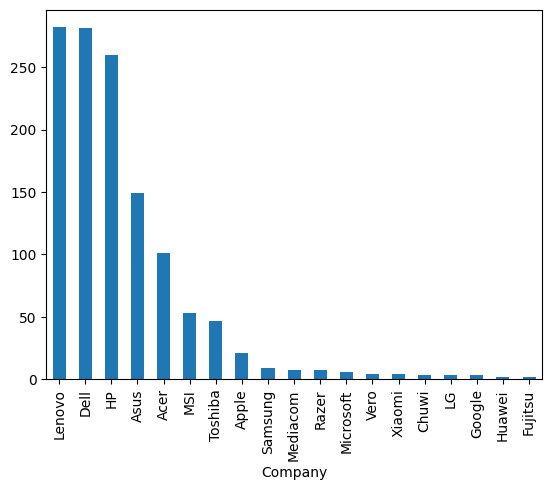

In [25]:
df["Company"].value_counts().plot(kind="bar")

Lenovo have highest in no. of laptop selled.

/tmp/ipython-input-26-3178995481.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


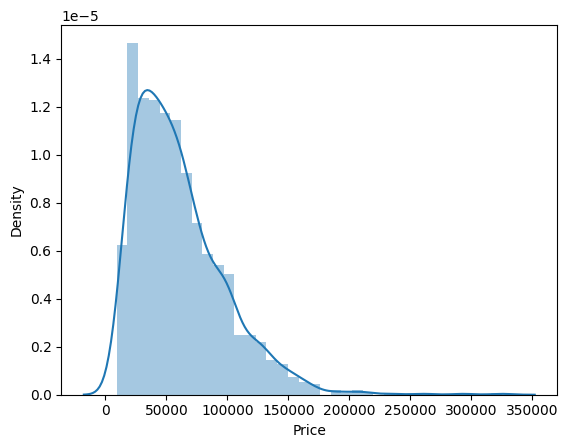

In [26]:
sns.distplot(df["Price"])
plt.show()

Mostly selled laptops price lies under Price 50000.

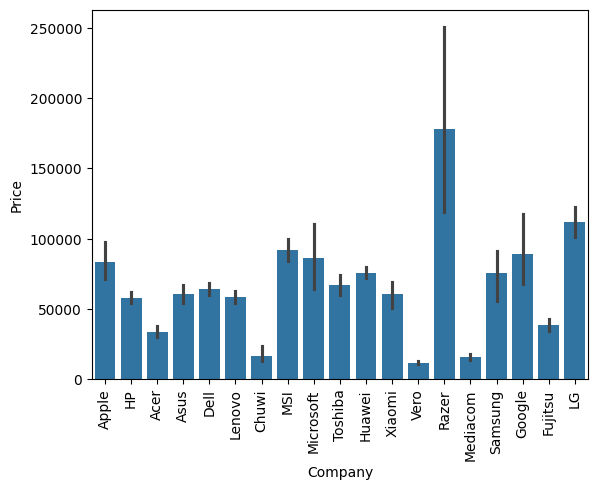

In [27]:
sns.barplot(x = df['Company'],y=df['Price'], data=df)
plt.xticks(rotation = "vertical")
plt.show()

Brands do affect the price of laptops.

In [28]:
df["TypeName"].value_counts()

,count
TypeName,
Notebook,689
Gaming,203
Ultrabook,189
2 in 1 Convertible,112
Workstation,29
Netbook,22


<Axes: xlabel='TypeName'>

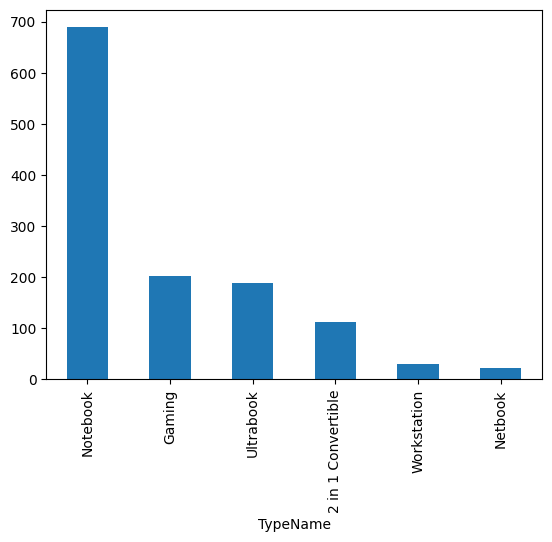

In [29]:
df["TypeName"].value_counts().plot(kind="bar")

Notebook type of laptop is sold more and Netbook is least sold.

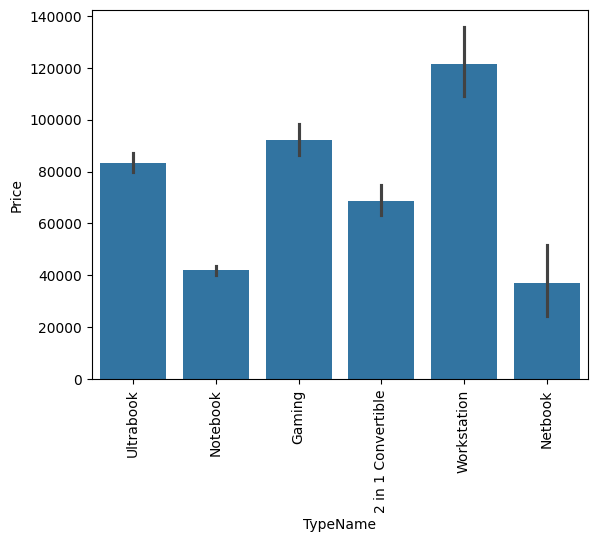

In [30]:
sns.barplot(x = df['TypeName'],y=df['Price'], data=df)
plt.xticks(rotation = "vertical")
plt.show()

workstation is costs more price followed by gaming laptops

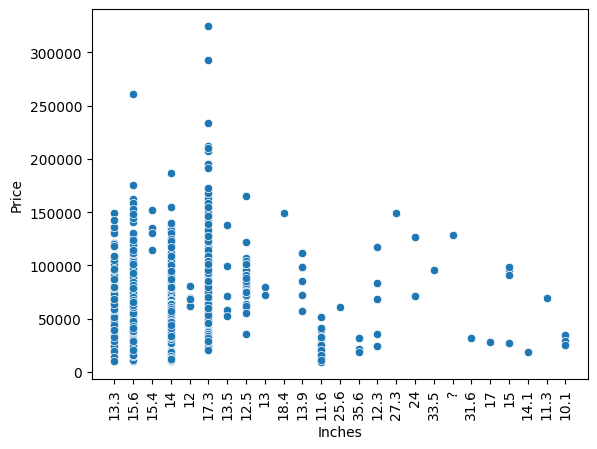

In [32]:
sns.scatterplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation = "vertical")
plt.show()

As laptop screen size increasing prices also increase

In [33]:
df["ScreenResolution"].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,493
1366x768,255
IPS Panel Full HD 1920x1080,222
IPS Panel Full HD / Touchscreen 1920x1080,50
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,14
IPS Panel 4K Ultra HD 3840x2160,12


In [35]:
df["Touchscreen"] = df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [38]:
df["Touchscreen"].value_counts()
# 1 means Touchscreen
# 0 means Not a Touch screen

,count
Touchscreen,
0,1063
1,181


<Axes: xlabel='Touchscreen'>

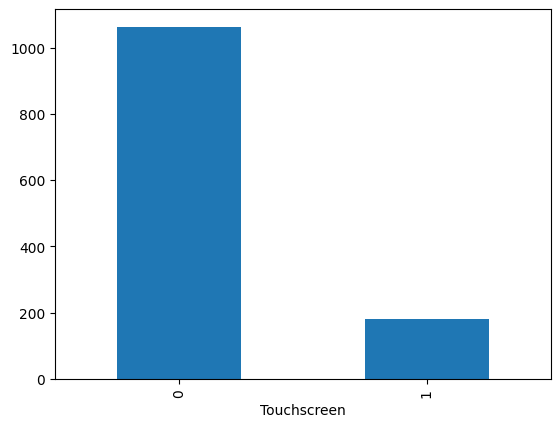

In [37]:
df["Touchscreen"].value_counts().plot(kind="bar")

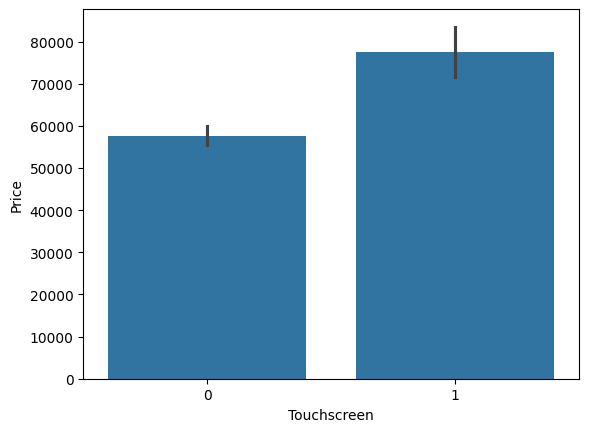

In [39]:
sns.barplot(x=df["Touchscreen"],y=df["Price"])
plt.show()

Price of Touchscreen laptop is higher.

<function matplotlib.pyplot.show(close=None, block=None)>

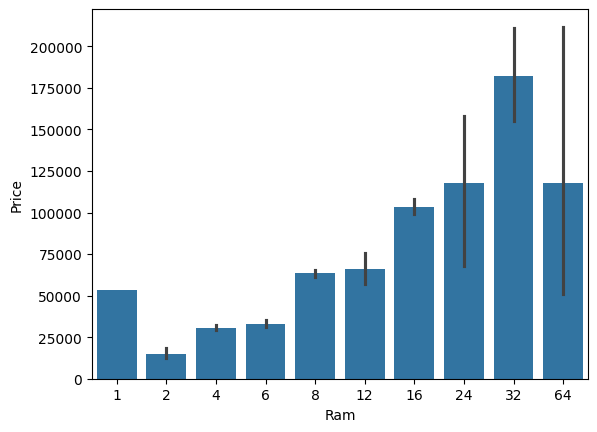

In [42]:
sns.barplot(x= df["Ram"],y=df["Price"])
plt.show

As RAM size is increasing price is increasing

In [36]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0


As here we are about to implement ML for pice prediction . Here it can be seen that output data which is Price is a liner regression

#Train and test

In [47]:
x = df.iloc[:,:-2]
x

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37
...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20
1270,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30
1272,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50


In [48]:
y = df["Price"]
y

,Price
0,71378.6832
1,47895.5232
2,30636.0000
3,135195.3360
4,96095.8080
...,...
1269,38378.6496
1270,33992.6400
1271,79866.7200
1272,12201.1200


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [50]:
x_train

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
517,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,24,512GB SSD,Nvidia GeForce GTX1080,Windows 10,2.24
941,Asus,Notebook,17.3,1600x900,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.80
1211,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.20
984,Toshiba,Notebook,14,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.75
929,HP,Notebook,14,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.95
...,...,...,...,...,...,...,...,...,...,...
477,Lenovo,Notebook,14,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,180GB SSD,Intel HD Graphics 620,Windows 10,1.70
308,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.30
505,Lenovo,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.44
539,Lenovo,Notebook,14,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.87
